# Numpy

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)
time_index = pd.date_range('2022-01-01', '2022-06-01', freq='D')
val = np.random.standard_normal(size=len(time_index))
df = pd.Series(data=val, index=time_index)
print(df.head())

2022-01-01    1.624345
2022-01-02   -0.611756
2022-01-03   -0.528172
2022-01-04   -1.072969
2022-01-05    0.865408
Freq: D, dtype: float64


## 1.1 np.ravel
numpy.ravel(a, order='C')

Return a contiguous flattened array.

In [5]:
x = np.ravel(df.dropna())
print(x.shape)

(152,)


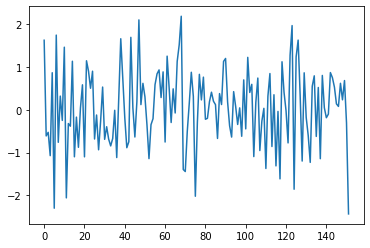

In [6]:
plt.plot(x); plt.show()

## 1.2 np.clip
numpy.clip(a, a_min, a_max, out=None, **kwargs)

Clip (limit) the values in an array.

Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.

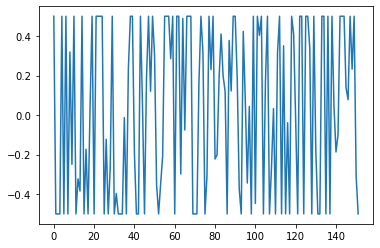

In [7]:
plt.plot(np.clip(x, -0.5, 0.5)); plt.show()

# 2. Scipy

## 2.1 scipy.signal.savgol_filter

scipy.signal.savgol_filter(x, window_length, polyorder, deriv=0, delta=1.0, axis=- 1, mode='interp', cval=0.0)

Apply a Savitzky-Golay filter to an array.

Suppose the window_length is M and the polyorder is N, then the SG filter uses a N-order polynomial to estimate M data points.

Note that if $M = N+1$, then the polynomial interpolates all data points, and there are no smoothing effect.

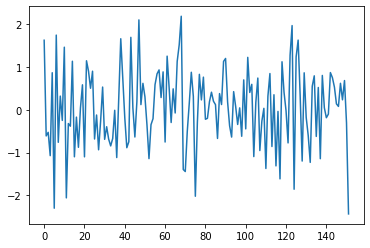

In [8]:
from scipy.signal import savgol_filter
plt.plot(x); plt.show()

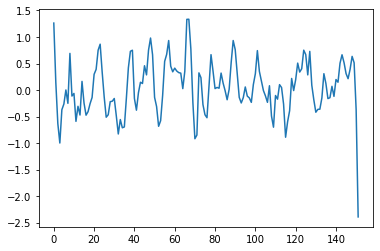

In [98]:
x_sagol = savgol_filter(
    x, 
    window_length=7,  # The length of the filter window 
    polyorder=3,      # The order of the polynomial used to fit the samples. polyorder must be less than window_length.
    deriv=0           # The order of the derivative to compute.
)
plt.plot(x_sagol); plt.show()

# 3. Pandas

## 3.1 Chain assignment
Ignore chain assignment warning

In [10]:
pd.options.mode.chained_assignment = None

# OS

In [11]:
import os

# get current working directory
os.getcwd()

'/Users/michael/Documents/Myles/Study/Python'

# Functools
## 1. Partial

partial fix some parameters for given function. Return a new partial object which when called will behave like func called with the positional arguments args and keyword arguments keywords. If more arguments are supplied to the call, they are appended to args. If additional keyword arguments are supplied, they extend and override keywords.

类func = functools.partial(func, *args, **keywords)

func: 需要被扩展的函数，返回的函数其实是一个类 func 的函数

*args: 需要被固定的位置参数

**kwargs: 需要被固定的关键字参数

In [89]:
from functools import partial

# add all arguments
def foo(*args):
    return np.sum(args)

print(foo(1, 2))  # 1 + 2

# add all arguments and add 10
foo2 = partial(foo, 10)
print(type(foo2))
foo2(1, 2)  # 1 + 2 + 10

3
<class 'functools.partial'>


13

In [90]:
def func(a, b):
    return a + b

def execute(func, *args, **kwargs):
    efunc = partial(func, *args, **kwargs)
    print(efunc())

execute(func, a=1, b=3)

4


# Decorators

## 1. Show function name and arguments

In [12]:
VERBOSE_OUTER = True  # Define a flag to make outer calls of functions visible, suggest set to True
VERBOSE_INNER = False  # Define a flag to make inner calls of functions visible, suggest set to False

from functools import wraps

def verbose_func_call(func):
    @wraps(func)
    def pname(*args, **kwargs):
        inp = f'Calling {func.__name__} with ' \
              f'args={[type(arg) if (hasattr(arg, "__iter__") and not isinstance(arg, str)) else arg for arg in args]}, ' \
              f'kwargs {[str(k) + "=" + str(type(v)) if (hasattr(v, "__iter__") and not isinstance(v, str)) else str(k) + "=" + str(v) for k, v in kwargs.items()]}'

        if VERBOSE_OUTER:
            print(inp)

        result = func(*args, **kwargs)
        return result
    return pname

@verbose_func_call
def square(x):
    return x ** 2

square(2)

Calling square with args=[2], kwargs []


4

# Multiprocessing

In [85]:
from pathos.helpers import cpu_count
import time
CPU_COUNT = cpu_count()
CPU_COUNT


from multiprocessing import Pool

start_time = time.time()
with Pool(processes=CPU_COUNT) as pool:
    print(pool.map_async(np.exp, range(15)).get())
    pool.close()
    pool.join()
print(time.time() - start_time)
start_time = time.time()
with Pool(processes=CPU_COUNT) as pool:
    res = [pool.apply_async(np.exp, args=(x,)) for x in range(15)]
    res = [x.get() for x in res]

print(res)
print(time.time() - start_time)

[1.0, 2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 148.4131591025766, 403.4287934927351, 1096.6331584284585, 2980.9579870417283, 8103.083927575384, 22026.465794806718, 59874.14171519782, 162754.79141900392, 442413.3920089205, 1202604.2841647768]
0.25831103324890137
[1.0, 2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 148.4131591025766, 403.4287934927351, 1096.6331584284585, 2980.9579870417283, 8103.083927575384, 22026.465794806718, 59874.14171519782, 162754.79141900392, 442413.3920089205, 1202604.2841647768]
0.39296793937683105


# Pathos

## 1. cpu_count()

In [13]:
from pathos.helpers import cpu_count
CPU_COUNT = cpu_count()
CPU_COUNT

12

## 2. multiprocessing module
This module contains map and pipe interfaces to Python’s multiprocessing module.

In [17]:
# instantiate and configure the worker pool
from pathos.multiprocessing import ProcessPool
pool = ProcessPool(nodes=CPU_COUNT)
pool.close()

In [23]:
# "_ProcessPool" is equal to "multiprocess.pool.Pool"
from pathos.multiprocessing import _ProcessPool
pool = _ProcessPool(CPU_COUNT)
print(pool)

from multiprocess.pool import Pool
pool = Pool(CPU_COUNT)
print(pool)
pool.close()

In [37]:
from functools import partial, reduce
efunc = partial(np.exp)
with _ProcessPool(CPU_COUNT) as pool:
    async_fut = pool.apply_async(efunc, args=[1, 2, 3])
    async_res = async_fut.get()
    
def ensemble_execute(func, cases=None, *args, **kwargs):
    assert cases is not None, "cases must not be None when executing ensemble"
    efunc = partial(func, *args, **kwargs)

    print(f"[Ensemble executor] Ensemble initiated on {len(cases)} cases.")

    with Pool(CPU_COUNT) as pool:
        async_fut = [pool.apply_async(efunc, args=(), kwds=_c) for _c in cases]
        async_res = [_fut.get() for _fut in async_fut]

    print(f"[Ensemble executor] Ensemble completed.")

    return async_res

TypeError: exp() takes from 1 to 2 positional arguments but 3 were given

In [64]:
from pathos.multiprocessing import ProcessPool
# pool = ProcessPool(nodes=CPU_COUNT)
pool = pathos.multiprocessing.Pool()
def f(a, b):
    return a + b

pool.map_async(f, (1, 2), (2, 3))
pool.close()
pool.join()

TypeError: '<=' not supported between instances of 'tuple' and 'int'

# Preprocessing

## 1. Difference

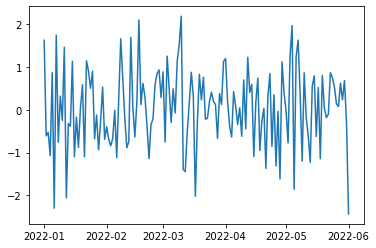

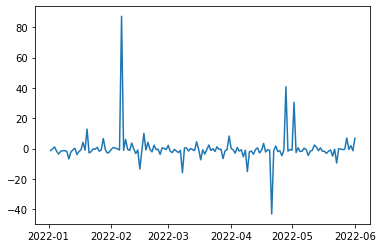

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)
time_index = pd.date_range('2022-01-01', '2022-06-01', freq='D')
val = np.random.standard_normal(size=len(time_index))
df = pd.Series(data=val, index=time_index)

def data_diff(df, period, flag):
    df = df.ffill()
    
    # if data is a percentage
    if flag == 'percent':
        df = df.diff(periods=period)
    
    # if data is a nominal amount
    if flag == 'amount':
        df = df.pct_change(periods=period)
        
    df = df.ffill()
    return df

plt.plot(df); plt.show()
df2 = data_diff(df, 1, 'amount')
plt.plot(df2); plt.show()

## 2. Normalize

[PowerTransformer] Creating new transformers.
[PowerTransformer] Created and applied 1 transformers.


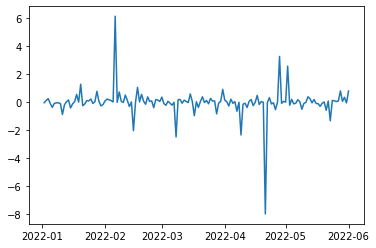

<class 'sklearn.preprocessing._data.PowerTransformer'>


In [55]:
from sklearn.preprocessing import PowerTransformer

def df_normalize(df, ptr=None, clip_range=None, renorm_flag=False, verbose=True):
    '''
        Returns the fit-transformed data using Yeo-Johnson Power Transform to tackle hetero-skedasticity.
        Then, clipping is applied to remove effect of extreme values and to reduce dimensionality.

        Some other transforms are coded but not used in the data, as the performance of the resulting model
        is not ideal.

        Input:
            @DataFrame df: the input dataframe,
            ptr: the saved fitted power trandformer, if any

        Returns:
            @DataFrame dat: the transformed dataframe.
    '''
    # return df, None

    norm = lambda x: (x - np.mean(x)) / np.std(x)
    dat = df.copy()

    if not clip_range: clip_range = (-99, 99)
    if not ptr:
        ptr = []
        if verbose: print("[PowerTransformer] Creating new transformers.")
        for col in df.columns:
            _ptr = PowerTransformer(method="yeo-johnson")
            dat[col] = _ptr.fit_transform(np.array(df[col]).reshape(-1, 1)).clip(*clip_range)
            
            # reshape(-1, 1) means that 1 columns and auto-length rows
            
            ptr.append(_ptr)
        if verbose: print(f"[PowerTransformer] Created and applied {len(ptr)} transformers.")
    else:
        if verbose: print("[PowerTransformer] Using existing transformer.")
        for ix, col in enumerate(df.columns):
            dat[col] = ptr[ix].transform(np.array(df[col]).reshape(-1, 1)).clip(*clip_range)
        if verbose: print(f"[PowerTransformer] Applied {len(ptr)} transformers.")

    if renorm_flag:
        dat = dat.apply(norm, axis=1)

    return dat, ptr

df3, ptr = df_normalize(df2.to_frame())
plt.plot(df3[0]); plt.show()
print(type(ptr[0])) # print the saved power transformer

## 3. Lagging
Independent variable shift(n_lag)

Or dependent variable shift (-n_lag)